In [1]:
import IPython.core.display as di
di.display_html('<script>jQuery(function() {if (jQuery("body.notebook_app").length == 0) { jQuery(".input_area").toggle(); jQuery(".prompt").toggle();}});</script>', raw=True)

This is a summary of the work done on the 24th of July. It began with an attempt to design the actual FTS. The four ellipses in the center where the foci of each are placed specifically at the center of another ellipse. This led to a problem of the order of shifting and rotating that had to be remedied by switching the order of functions. 

This became clear when the ellipses were shown to have different x-axes, and therefore rotation could NOT be around the same axis. (see page 93 and 94).

The work done is in Four Center Ellipses and MultipleFTSEllipses. 

This is shown below.

In [2]:
import numpy as np
import matplotlib.pyplot as pl
import itertools
from mpl_toolkits.mplot3d import Axes3D
from raytracefunnotes import *

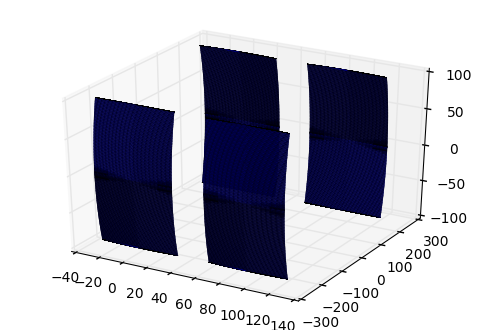

In [3]:
origin = [0,0] #x,y
origin1 = [90,0] #x,y

coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X1,Y1,Z1,X2,Y2,Z2 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin, 'pos')
#Centered around x-axis, shifted
X3,Y3,Z3,X4,Y4,Z4 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
#centered around x-axis, not shifted, reversed. NOT APPROPRIATELY ADJUSTED FOR FOCI
X5,Y5,Z5,X6,Y6,Z6 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin, 'neg')
#centered around x-axis, shifted, reversed
X7,Y7,Z7,X8,Y8,Z8 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'neg')
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X1,Y1,Z1, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X2,Y2,Z2, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X3,Y3,Z3, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X4,Y4,Z4, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X5,Y5,Z5, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X6,Y6,Z6, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X7,Y7,Z7, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X8,Y8,Z8, linewidth = .2, antialiased=True)
pl3dsurf.set_ylim([-300,300])
pl.show()

Above is the FTS ellipses separated by 256. The foci of all ellipses lies on the x axis at 0. However, the FTS has the foci located at the center of the corresponding ellipse. Therefore these two pairs must be shifted towards the center by 64, yet must still be rotated around the hypotethetical current x-axis. 

Therefore, the code I have currently which shifts before rotating, is incorrect. A clear example of this is below. 

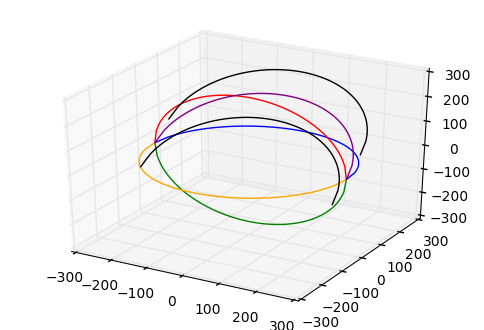

In [13]:
#This is proof of how I have to shift as a LAST STEP. 
#how this is rotated around the x axis by pi/2
pl3d = pl.figure().gca(projection = '3d')
x,y,y2,z = createellipse([263.9,256,64.15])
pl3d.plot(x,y,z, 'blue')

x1,y1,z1 = rotatestrand(np.pi/2,[263.9,256,64.15] )
pl.plot(x1,y1,z1 ,'green')

x2,y2,z2 = rotatestrand(-np.pi/2,[263.9,256,64.15] )
pl.plot(x2,y2,z2 ,'red')

x3,y3,z3 = rotatestrand(np.pi,[263.9,256,64.15] )
pl.plot(x3,y3,z3 ,'orange')

x4,y4,z4 = rotatestrand(-np.pi/4,[263.9,256,64.15] )
pl.plot(x4,y4,z4 ,'purple')

origin1 = [0,95] #x,y
x5,y5,z5 = rotatestrandboundshift(-np.pi/4, [263.9,256,64.15], 2*263.9, origin1)
pl.plot(x5,y5,z5 ,'black')

origin2 = [0,-95]
x6,y6,z6 = rotatestrandboundshift(-np.pi/4, [263.9,256,64.15], 2*263.9, origin2)
pl.plot(x6,y6,z6 ,'black')

pl.show()

The Red, Purple, Blue, Yellow, and Green are all ellipses that were created with an origin at the center and THEN rotated around the x-axis. 

The Black is an ellipse created with a center of [0,95], meaning I wanted it to be the blue ellipse simply 95 units further back on the y axis. However instead it is created with a different origin and then rotated around the normal x-axis, leading to the warped shape above.

This may lead to the need to create the ellipses in different vector spaces and then superimposing them. 

Wait, it actually might be working. 

In [9]:
origin = [0,-64] #x,y
origin1 = [90,-64] #x,y
origin2 = [0,64]
origin3 = [90,64] #x,y 
coeffellipse = [263.9,256,64.15] 
#Centered around x-axis, not shifted, 
X12,Y12,Z12,X22,Y22,Z22 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin, 'pos')
#Centered around x-axis, shifted
X32,Y32,Z32,X42,Y42,Z42 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin1, 'pos')
#centered around x-axis, not shifted, reversed. APPROPRIATELY ADJUSTED FOR FOCI
X52,Y52,Z52,X62,Y62,Z62 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin2, 'neg')
#centered around x-axis, shifted, reversed. APPROPRIATELY ADJUSTED FOR FOCI
X72,Y72,Z72,X82,Y82,Z82 = FTSCEllipsoid(50,np.pi/8, coeffellipse, 64.15, origin3, 'neg')

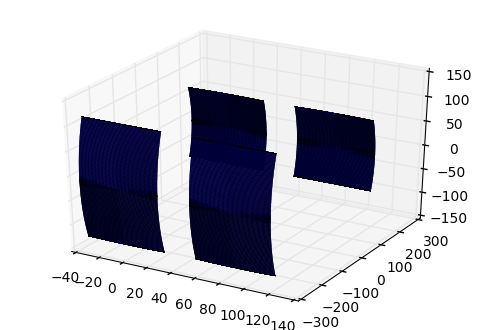

In [10]:
pl3dsurf = pl.figure().gca(projection = '3d')
pl3dsurf.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X32,Y32,Z32, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X42,Y42,Z42, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X52,Y52,Z52, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X62,Y62,Z62, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X72,Y72,Z72, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X82,Y82,Z82, linewidth = .2, antialiased=True)
pl3dsurf.set_ylim([-300,300])
pl.show()

It looks like they are different sizes (hence the confusion about the affects of the change in origin). 

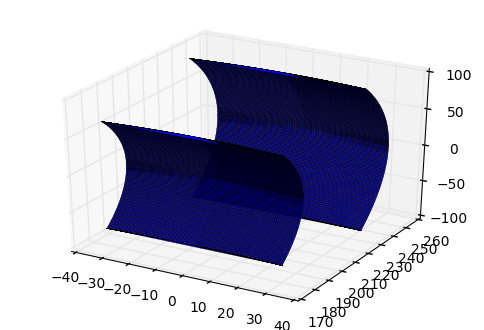

In [11]:
pl3dsurf = pl.figure().gca(projection = '3d')

pl3dsurf.plot_trisurf(X1,Y1,Z1, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X2,Y2,Z2, linewidth = .2, antialiased=True)

pl3dsurf.plot_trisurf(X12,Y12,Z12, linewidth = .2, antialiased=True)
pl3dsurf.plot_trisurf(X22,Y22,Z22, linewidth = .2, antialiased=True)
pl.show()

But at the same time they DO LOOK LIKE THE SAME SIZE. IM CONFUSED. Figure out if it is a graphics problem or an actual mathematical problem.  